1. Evaluación de Algoritmos:

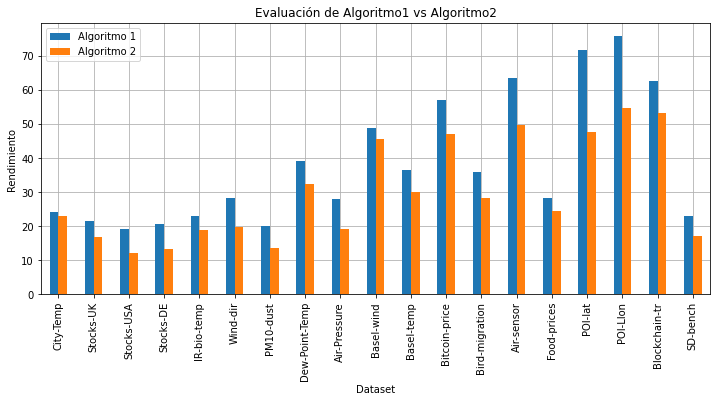

In [0]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Crear la sesión de Spark
spark = SparkSession.builder.appName("EvaluacionAlgoritmos").getOrCreate()

# Cargar los datos con PySpark
df_spark = spark.read.option("header", "true").csv('/FileStore/tables/comparasion_algoritmos.csv', inferSchema=True)

# Convertir a pandas para visualización
df = df_spark.toPandas()

# Graficar en pandas
ax = df.plot(
    kind='bar',
    x='dataset',
    y=['algoritmo1', 'algoritmo2'],
    figsize=(12, 5)
)

ax.grid(visible=True)
ax.set_xlabel("Dataset")
ax.set_ylabel("Rendimiento")
ax.set_title("Evaluación de Algoritmo1 vs Algoritmo2")
ax.legend(labels=['Algoritmo 1', 'Algoritmo 2'], loc='upper left', bbox_to_anchor=(0, 1))
ax.set_axisbelow(True)
plt.show()


2. Gráficos de Barras Múltiples:

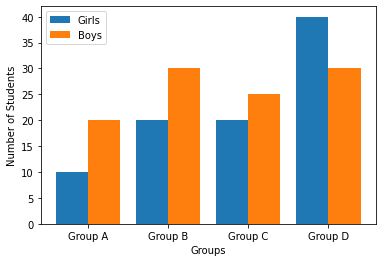

In [0]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt

# Crear la sesión de Spark
spark = SparkSession.builder.appName("GraficosDeBarras").getOrCreate()

# Crear los datos con PySpark (puedes obtenerlos de un archivo si lo deseas)
data = [('Group A', 'Girl', 10), ('Group A', 'Boy', 20),
        ('Group B', 'Girl', 20), ('Group B', 'Boy', 30),
        ('Group C', 'Girl', 20), ('Group C', 'Boy', 25),
        ('Group D', 'Girl', 40), ('Group D', 'Boy', 30)]

columns = ['Groups', 'Sex', 'Number of Students']

# Crear DataFrame de PySpark
df_spark = spark.createDataFrame(data, columns)

# Convertir a pandas para visualización
df = df_spark.toPandas()

# Graficar barras múltiples
X = df['Groups'].unique()
Ygirls = df[df['Sex'] == 'Girl']['Number of Students'].values
Zboys = df[df['Sex'] == 'Boy']['Number of Students'].values

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Ygirls, 0.4, label='Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label='Boys')
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.legend()
plt.show()


3. Gráfico de Barras con seaborn:

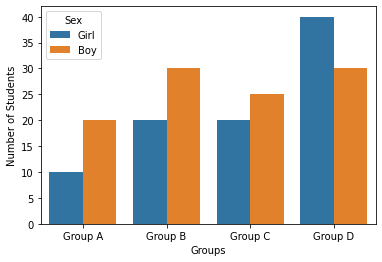

In [0]:
from pyspark.sql import SparkSession
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Crear la sesión de Spark
spark = SparkSession.builder.appName("GraficosDeBarrasSeaborn").getOrCreate()

# Crear los datos con PySpark (puedes obtenerlos de un archivo si lo deseas)
data = [('Group A', 'Girl', 10), ('Group A', 'Boy', 20),
        ('Group B', 'Girl', 20), ('Group B', 'Boy', 30),
        ('Group C', 'Girl', 20), ('Group C', 'Boy', 25),
        ('Group D', 'Girl', 40), ('Group D', 'Boy', 30)]

columns = ['Groups', 'Sex', 'Number of Students']

# Crear DataFrame de PySpark
df_spark = spark.createDataFrame(data, columns)

# Convertir a pandas para visualización
df = df_spark.toPandas()

# Graficar con seaborn
sns.barplot(
    data=df, 
    x='Groups', 
    y='Number of Students', 
    hue='Sex'
)

plt.show()

1. Lectura de datos: Usamos spark.read.csv para leer el archivo en lugar de pd.read_csv.
2. Transformaciones de datos: La mayor parte de las manipulaciones se hacen en PySpark, pero luego convertimos el DataFrame de PySpark a pandas (df_spark.toPandas()) para visualización, ya que PySpark no tiene soporte directo para matplotlib o seaborn.
3. Visualización: Utilizamos matplotlib y seaborn como en el código original, pero pasamos de un DataFrame de pandas a uno de PySpark cuando es necesario procesar grandes volúmenes de datos.